In [18]:
import os, sys
import numpy as np
import scipy
import math as m
import cmath as cm
from pprint import pprint


PROJECT_CWD = r"/home/pignari/Desktop/neural_networks/DeepLearning_models"
sys.path.append(PROJECT_CWD)

from my_packages.neural_network.data_generators.mixed_array_generator import MixedArrayGenerator
from my_packages.neural_network.data_generators.iterator import DataIterator

from my_packages.neural_network.data_generators.mixed_array_generator import MixedArrayGenerator
from my_packages.neural_network.data_generators.iterator import DataIterator

# torch import 
import torch
from torch.utils.data import TensorDataset, DataLoader


print("cuda available: ", torch.cuda.is_available())
print("number of GPUs: ",torch.cuda.device_count())
if torch.cuda.is_available():
    print("I am currently using device number: ", torch.cuda.current_device())
    print("the device object is: ", torch.cuda.device(0))
    print("the device name is: ", torch.cuda.get_device_name(0))



cuda available:  False
number of GPUs:  0


In [23]:
data_dir = "/share/NN_data/high_res_with_noise"
training_data_db_name = "train_and_valid_dataset.pt"
test_data_db_name = "test_dataset.pt"

fullpath_train = os.path.join(data_dir, training_data_db_name)
fullpath_test = os.path.join(data_dir, test_data_db_name)
# load the data from the datasets
train_and_valid_dataset = torch.load(fullpath_train)
test_dataset = torch.load(fullpath_test)

# test
print("train_and_valid_dataset size: ", len(train_and_valid_dataset))
print("test_dataset size: ", len(test_dataset))

train_and_valid_dataset size:  10
test_dataset size:  5


torch.Size([3, 50, 50]) torch.Size([3, 21, 21])


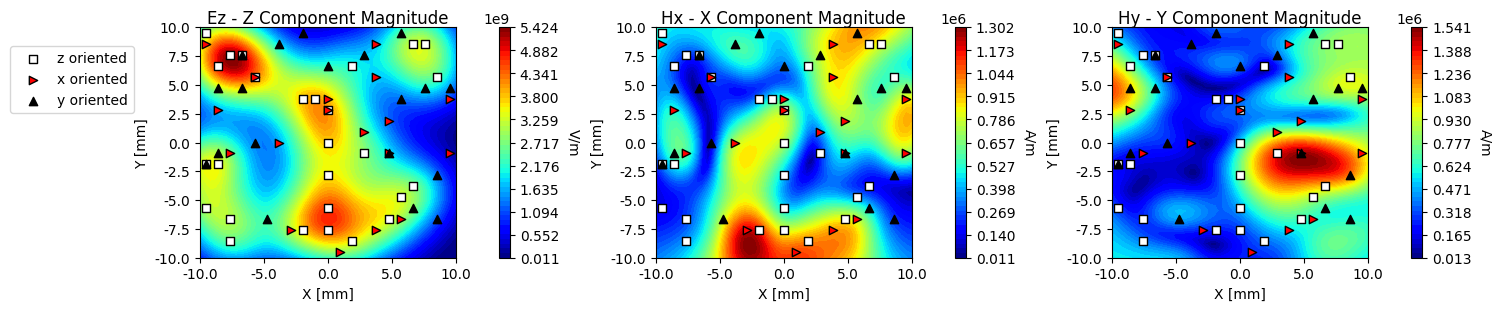

In [24]:
%matplotlib inline

# data parameters
resolution=(21,21)
field_res = (50,50)
xbounds = [-0.01, 0.01]
ybounds = [-0.01, 0.01]
dipole_height = 1e-3
substrate_thickness = 1.4e-2
substrate_epsilon_r = 4.4
dynamic_range = 2
probe_height = 0.6e-2
dipole_density_E = 0.1
dipole_density_H = 0.1
data_dir = "/share/NN_data/high_res_with_noise"


rmg = MixedArrayGenerator(
    resolution=resolution,
    xbounds=xbounds,
    ybounds=ybounds,
    dipole_height=dipole_height,
    substrate_thickness=substrate_thickness,
    substrate_epsilon_r=substrate_epsilon_r,
    probe_height=probe_height,
    dynamic_range=dynamic_range,
    f=[1e9],
    field_res=field_res,
    dipole_density_E=dipole_density_E,
    dipole_density_H=dipole_density_H
    )


f, l = train_and_valid_dataset[0]

print(f.shape, l.shape)

rmg.plot_labeled_data(f, l)